In [1]:
import os
import pandas as pd
#import scanpy as sc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import anndata
import matplotlib.pyplot as plt
import sys
import seaborn as sns
sys.path.append("..")
from list_feat_params import *
#from ml_framework.clusteringMethods import *
from my_stannot import add_stat_annotation
%matplotlib inline

pathname='LowNo_map'
dataset_name = "PreSyn_Single_evt_CG2Eloi_Prem_35Ch_MultiSpecies_13Apr2021_spill_not_applied_scaled_events"
PATH = ("/home/eloiseb/stanford_drive/data/SynTOF/csv/" +
                dataset_name + "_train_" + pathname + '.csv')


In [9]:
sys.path.append("../SynTOF2022/figures/")

import params_visu
from load_data import load_data
savepath = "/home/eloiseb/experiments/aec_joe/MARKER_20/"

In [3]:

keys = ["ctx", "str", "hipp"]
dico_list = {"ctx" : params_visu.params_ctx,
                      "str":params_visu.params_str,
                      "hipp":params_visu.params_hipp}
list_feat_all = list_feat_surface #+ list_feat_activity
dico_df = {}
    
for region in keys:
        params = dico_list[region]
        df, save_dir = load_data(params, region, list_feat_all) 
        dico_df[region] = df

df_tot = pd.concat([dico_df[kk] for kk in keys], keys=keys, axis=0)#, ignore_index=True)
df_tot

df_tot.reset_index(level=0,inplace=True)
df_tot

df_tot.rename(columns={"level_0":"Brain_region"}, inplace=True)
df_tot

df_tot.columns

df_tot.to_csv(savepath + "3_model_hidden_rep_after_filtering.csv",index=False)

In [10]:
dico_heatmap={}
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

cluster_method = "aec"
for kk in keys:
    df = dico_df[kk]
    df_ = df[list_feat_all + [cluster_method, 'Sample_num']]
    df_hu_m_k_s = df_.groupby([cluster_method, 'Sample_num']).mean()
    mm_hu = df_hu_m_k_s.reset_index()
    mmmm_hu = mm_hu.groupby([cluster_method]).mean().reset_index()
    mmmm_hu[list_feat_all] = scaler.fit_transform(mmmm_hu[list_feat_all])
    mmmm_hu = mmmm_hu.groupby([cluster_method]).mean().reset_index()
    print(mmmm_hu)
    nb_clusters = df_[cluster_method].nunique()
    dico_heatmap[kk] = {"mat":mmmm_hu, "nb_clusters":nb_clusters}

df_heat_tot = pd.concat([dico_heatmap[kk]["mat"] for kk in keys], keys=keys, axis=0)#, ignore_index=True)

df_heat_tot.reset_index(inplace=True)
df_heat_tot.drop("level_1", axis=1,inplace=True)

df_heat_tot.rename(columns={'level_0':'Brain_regions'}, inplace=True)

df_heat_tot.to_csv(savepath + "3_modelheatmap__hidden_rep_after_filtering.csv", index=False)

df_heat_tot= pd.read_csv(savepath + "3_modelheatmap__hidden_rep_after_filtering.csv", index_col=False)

df_heat_tot.rename(columns={"level_0":"Brain_regions"}, inplace=True)

df_heat_tot.Brain_regions.replace({"ctx":"C","str":"NS", "hipp":"H"}, inplace=True)


df_heat_tot.set_index(["Brain_regions", "aec"], inplace=True)

df_heat_tot

In [60]:
df_mE_ = df_heat_tot.T.corr()
df_mE_

df_mE_.index
dir_path = savepath

# Cross-region correlation matrix

/home/eloiseb/miniconda3/envs/jupyter/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


[Text(0.5, 0, 'C-A1'), Text(1.5, 0, 'C-Mu1'), Text(2.5, 0, 'C-Mu2'), Text(3.5, 0, 'C-Mu3'), Text(4.5, 0, 'C-Mu4'), Text(5.5, 0, 'C-P1'), Text(6.5, 0, 'C-P10'), Text(7.5, 0, 'C-P11'), Text(8.5, 0, 'C-P2'), Text(9.5, 0, 'C-P3'), Text(10.5, 0, 'C-P4'), Text(11.5, 0, 'C-P5'), Text(12.5, 0, 'C-P6'), Text(13.5, 0, 'C-P7'), Text(14.5, 0, 'C-P8'), Text(15.5, 0, 'C-P9'), Text(16.5, 0, 'NS-NS-P1'), Text(17.5, 0, 'NS-NS-P10'), Text(18.5, 0, 'NS-NS-P11'), Text(19.5, 0, 'NS-NS-P12'), Text(20.5, 0, 'NS-NS-P13'), Text(21.5, 0, 'NS-NS-P14'), Text(22.5, 0, 'NS-NS-P15'), Text(23.5, 0, 'NS-NS-P2'), Text(24.5, 0, 'NS-NS-P3'), Text(25.5, 0, 'NS-NS-P4'), Text(26.5, 0, 'NS-NS-P5'), Text(27.5, 0, 'NS-NS-P6'), Text(28.5, 0, 'NS-NS-P7'), Text(29.5, 0, 'NS-NS-P8'), Text(30.5, 0, 'NS-NS-P9'), Text(31.5, 0, 'H-H-Hu1'), Text(32.5, 0, 'H-H-Hu2'), Text(33.5, 0, 'H-H-Hu3'), Text(34.5, 0, 'H-H-Hu4'), Text(35.5, 0, 'H-H-Hu5'), Text(36.5, 0, 'H-H-Hu6'), Text(37.5, 0, 'H-H-HuMu1'), Text(38.5, 0, 'H-H-HuMu2'), Text(39.5, 0

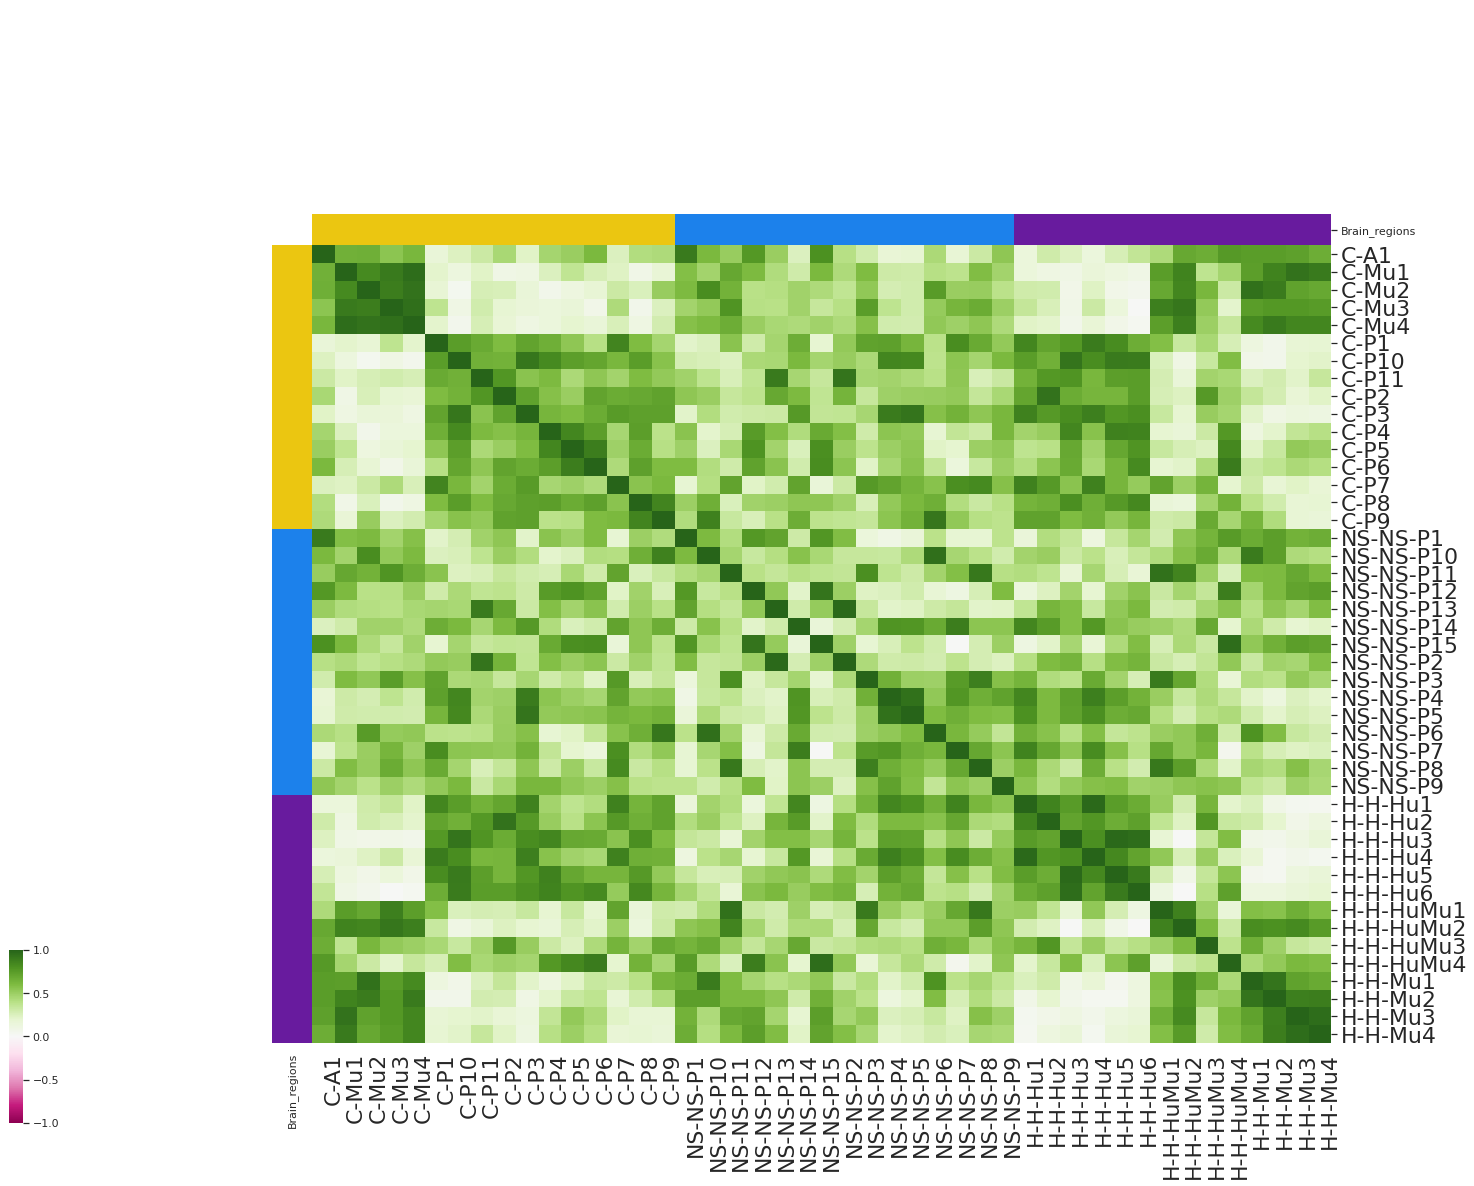

In [62]:
color_species={"C":"#EBC611", "H":"#681B9E", "NS":"#1C81EB"}

df_mE_tmp = df_heat_tot.T.corr()
import numpy as np
from scipy.stats import pearsonr,spearmanr
df_mE_tmp.columns = df_mE_tmp.columns.map('|'.join).str.strip('|')
df_mE_tmp.index = df_mE_tmp.index.map('|'.join).str.strip('|')
def calculate_pvalues(df, bonf_corr=0):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = spearmanr(df[r], df[c])[1]
            bonf_corr+=1
    return pvalues, bonf_corr
df_pvalue,bonf_corr = calculate_pvalues(df_mE_tmp)
index = np.triu_indices(1)
#or
pp_value =np.asarray(df_pvalue)[np.triu_indices(np.asarray(df_pvalue).shape[0], k = 1)]
#print(pp_value)
from statsmodels.stats.multitest import fdrcorrection
_,pvaluecorrected = fdrcorrection(pp_value,method='indep', is_sorted=False)
#print(np.asarray(pvaluecorrected, dtype=np.float32))
q_val = -np.log(np.asarray(pvaluecorrected, dtype=np.float32))

#df_pvalue *= bonf_corr
size_X = np.asarray(df_pvalue).shape[0]
X = np.zeros((size_X,size_X))
X[np.triu_indices(X.shape[0], k = 1)] = q_val #pvaluecorrected

df_pvalue.loc[:,:] = X + X.T + 1*np.eye(size_X)
df_pvalue.reset_index(inplace=True)

df_pvalue["Brain_regions"] = df_pvalue["index"].str.split("|",expand=True)[0]
df_pvalue["aec"] = df_pvalue["index"].str.split("|",expand=True)[1]
df_pvalue.set_index(["Brain_regions","aec"],inplace=True)
df_pvalue.drop("index",axis=1,inplace=True)
#print(df_pvalue)
dff_pvalue = df_pvalue.T
dff_pvalue.reset_index(inplace=True)
dff_pvalue["Brain_regions"] = dff_pvalue["index"].str.split("|",expand=True)[0]
dff_pvalue["aec"] = dff_pvalue["index"].str.split("|",expand=True)[1]
dff_pvalue.set_index(["Brain_regions","aec"],inplace=True)
dff_pvalue.drop("index",axis=1,inplace=True)
#print(dff_pvalue.isna().sum())

#df_mE_=1000*dff_pvalue
#print(dff_pvalue)
humk_c= "#7680B6"
mu_c = "#055C6B"#"#FDB0C4","#D64D86","#D69ABF""
a1_c = "#B1B1B1"
humu_c = '#B5A188'#,"H-HuMu2":"#B37D46", "H-HuMu3":"",
hu_c = "#B5B264"

dico_color = {"P%d"%k:humk_c for k in range(1,12) }
dico_color.update({"Mu%d"%k:mu_c for k in range(1,5) })
dico_color.update({"A1":a1_c})
dico_color.update({"H-HuMu%d"%k:humu_c for k in range(1,5) })
dico_color.update({"H-Mu%d"%k:mu_c for k in range(1,6) })
dico_color.update({"H-Hu%d"%k:hu_c for k in range(1,7) })
dico_color.update({"NS-P%d"%k:humk_c for k in range(1,16) })
sp_labels = df_mE_.columns.get_level_values(0)
sp_pal = sns.cubehelix_palette(sp_labels.unique().size, light=.9, dark=.1, reverse=True, start=1, rot=-2)
sp_lut = dict(zip(map(str, sp_labels.unique()), sp_pal))
sp_colors = pd.Series(sp_labels, index=df_mE_.columns).map(color_species)

# node aec colors
node_labels = df_mE_.columns.get_level_values(1)
node_pal = sns.cubehelix_palette(node_labels.unique().size,light=.9, dark=.1, reverse=True, start=1, rot=-2)
node_lut = dict(zip(map(str, node_labels.unique()), node_pal))
node_colors = pd.Series(node_labels, index=df_mE_.columns).map(dico_color)

#df of row and col maps
aec_node_colors = pd.DataFrame(sp_colors)#.join(pd.DataFrame(node_colors))
sns.set(font_scale=1)

df_mE_ = (df_mE_ - df_mE_.min().min())/(df_mE_.max().max() - df_mE_.min().min())
g= sns.clustermap(df_mE_.astype(float),figsize=(20,16),
            yticklabels=True,
                  row_cluster=False, col_cluster=True,
                  xticklabels=True, 
                  #dendrogram_ratio=(0.1,.1),
                  cmap="PiYG",
                  vmin=-1,
            row_colors=aec_node_colors,col_colors=aec_node_colors,linewidths=0)
#for label in sp_labels.unique():
#        g.ax_col_dendrogram.bar(0, 0, color=color_species[str(label)], label=label, linewidth=2)
    
#l1 = g.ax_col_dendrogram.legend(title='Specie', loc="upper right", ncol=1, bbox_to_anchor=(0.1,-3))
                                               
# node legend
for label in node_labels.unique():
    g.ax_row_dendrogram.bar(0, 0, color=dico_color[label], label=label, linewidth=0)

#l2 = g.ax_row_dendrogram.legend(title='Cluster', loc='upper right', ncol=1, bbox_to_anchor=(5.5, 1))
g.ax_heatmap.tick_params(left=False, bottom=False) 
print(g.ax_heatmap.get_xticklabels())
ll = [str(it).split(',')[-1][2:-2] for it in g.ax_heatmap.get_xticklabels()]
print(ll)
g.ax_heatmap.set_xticklabels(ll, fontsize=22,horizontalalignment='left')
g.ax_heatmap.set_yticklabels(ll, fontsize=22,horizontalalignment='left')
g.cax.set_position([.01, .02, .01, .15])

g.ax_heatmap.set_ylabel("")
g.ax_heatmap.set_xlabel("")

#fig.tight_layout()
plt.savefig(savepath + "Spearmanr_mean_expression_cluster_brain_areas.png", bbox_inches="tight")
plt.show()

# Meta-graph

      level_0    level_1         0
0        C|A1       C|A1  1.000000
1        C|A1      C|Mu1  0.330504
2        C|A1      C|Mu2  0.347485
3        C|A1      C|Mu3  0.128847
4        C|A1      C|Mu4  0.261724
...       ...        ...       ...
2020  H|H-Mu4  H|H-HuMu4  0.197219
2021  H|H-Mu4    H|H-Mu1  0.385094
2022  H|H-Mu4    H|H-Mu2  0.776256
2023  H|H-Mu4    H|H-Mu3  0.916375
2024  H|H-Mu4    H|H-Mu4  1.000000

[2025 rows x 3 columns]
0.3892167627868664
0.078929182433811
         from         to     value Brain_region Cluster  Cluster_map    pvalue
5        C|A1       C|P1  0.628717            C      A1            0  0.002978
6        C|A1      C|P10  0.477706            C      A1            0  0.033087
9        C|A1       C|P3  0.503820            C      A1            0  0.023468
13       C|A1       C|P7  0.457629            C      A1            0  0.042383
16       C|A1   NS|NS-P1  0.814185            C      A1            0  0.000012
...       ...        ...       ...          

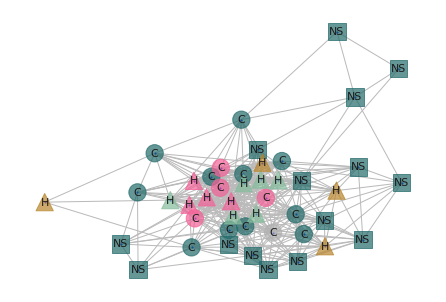

In [73]:
from scipy.stats import pearsonr,spearmanr
df_mE_tmp =df_heat_tot.T
df_mE_tmp.columns = df_mE_tmp.columns.map('|'.join).str.strip('|')
df_mE_tmp.index = df_mE_tmp.index.map('|'.join).str.strip('|')
def calculate_pvalues(df, bonf_corr=0):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = pearsonr(df[r], df[c])[1]
            bonf_corr+=1
    return pvalues, bonf_corr
df_pvalue,bonf_corr = calculate_pvalues(df_mE_tmp)
#df_pvalue *= bonf_corr
#print(df_pvalue)
humk_c= "#246B6B"#"#ADE319"
mu_c = "#F46197"#E07B41"##055C6B"#"#FDB0C4","#D64D86","#D69ABF""
a1_c = "#B1B1B1"
humu_c = "#B8852C"# '#B44CE0'#,"H-HuMu2":"#B37D46", "H-HuMu3":"",E9D985
hu_c = "#84BC9C"#415BE0"#B5B264"
dico_color = {"P%d"%k:humk_c for k in range(1,16) }
dico_color.update({"Mu%d"%k:mu_c for k in range(1,5) })
dico_color.update({"A1":a1_c})
dico_color.update({"H-HuMu%d"%k:humu_c for k in range(1,5) })
dico_color.update({"H-Mu%d"%k:mu_c for k in range(1,6) })
dico_color.update({"H-Hu%d"%k:hu_c for k in range(1,7) })
dico_color.update({"NS-P%d"%k:humk_c for k in range(1,16) })


df_mE_ = np.abs(df_heat_tot.T.corr())
df_mE_.columns = df_mE_.columns.map('|'.join).str.strip('|')
df_mE_.index = df_mE_.index.map('|'.join).str.strip('|')
#df_mE_ = (df_mE_ - df_mE_.min().min())/(df_mE_.max().max() - df_mE_.min().min())

links = df_mE_.stack().reset_index()

pvalue= df_pvalue.stack().reset_index()
print(links)
print(df_mE_.mean().mean())
print(df_mE_.quantile(0.25).min())
links.columns = ['from', 'to', 'value']
links["value"] = (links["value"]-links["value"].min())/(links["value"].max()-links["value"].min())
links[["Brain_region", "Cluster"]] = links["from"].str.split("|", expand=True)
links["Brain_region"].replace({"CTX":"C","NSTR":"NS", "HIPP":"H"}, inplace=True)
mapp = {it:k for it, k in zip(links["Cluster"].unique(), range(len(links["Cluster"].unique())))}
links["Cluster_map"] = links["Cluster"].replace(mapp)
links["pvalue"] = pvalue[0]
#print(links[(links.Specie==3) & (links.pvalue <= 0.05)])


import networkx as nx
links_filtered=links.loc[ (np.abs(links['value']) >= df_mE_.mean().mean()) & (links['from'] != links['to'])& (links['pvalue'] <= 0.05) ]#
print(links_filtered)

G=nx.from_pandas_edgelist(links_filtered, 'from', 'to', 'value')
print(nx.get_node_attributes(G,"Brain_region"))
links_filtered.set_index("from", inplace=True) 
links.set_index("from", inplace=True) 
nx.set_node_attributes(G, pd.Series(links.Brain_region, index=links.index).to_dict(), name='Brain_region')
nx.set_node_attributes(G, pd.Series(links.Cluster, index=links.index).to_dict(), name='Cluster')
nx.set_node_attributes(G, pd.Series(links.Cluster_map, index=links.index).to_dict(), name='Cluster_map')
number_to_adjust_by = 5

dico_spe = nx.get_node_attributes(G,"Brain_region")
node_list_sp = [ dico_spe[it] for it in G.nodes() ]


print(dico_spe)
nodePose = nx.layout.spring_layout(G,seed=19)
print(G)
node_list_hu = [int(it) for it in range(len(node_list_sp)) if node_list_sp[it] ==1]
nodePose_list_hu = {k: nodePose[k] for k in nodePose.keys() if dico_spe[k]==1}
nodePose_list_mk = {k: nodePose[k] for k in nodePose.keys() if dico_spe[k]==2}
print(node_list_hu)
print(nodePose_list_hu)
list_size_hu=[0 for _ in range(len(node_list_sp))]
for k in node_list_hu:
    list_size_hu[k] = 100
node_list_mk = [it for it in range(len(node_list_sp)) if node_list_sp[it] ==2]
list_size_mk=[0 for _ in range(len(node_list_sp))]
for k in node_list_mk:
    list_size_mk[k] = 100
node_list_mouse = [it for it in range(len(node_list_sp)) if node_list_sp[it] ==3]
dicosp = {"C":"o","NS":"s", "H":"^"}
node_colors = [dico_color[it.split('|')[1]] for it in G]
node_shapes = [dicosp[it.split('|')[0]] for it in G]
for i,node in enumerate(G.nodes()):
    G.nodes[node]['color'] = node_colors[i]
    G.nodes[node]['shape'] = node_shapes[i]

 
mapping_ll = {it:it.split('|')[0] for it in G}
nx.draw(G, nodePose,node_color="blue",labels=mapping_ll,
        font_size=11, font_family="cursive",
        node_size=1, edge_color='#BABABA', linewidths=1)

# Draw the nodes for each shape with the shape specified


for shape in set(node_shapes):
    # the nodes with the desired shapes
    node_list = [node for node in G.nodes() if G.nodes[node]['shape'] == shape]
    
    nx.draw_networkx_nodes(G,nodePose,
                           nodelist = node_list,
                           alpha=0.7, linewidths=1,
                           node_color= [G.nodes[node]['color'] for node in node_list],
                           node_shape = shape,
                          )   
    
#plt.tight_layout()

plt.savefig(savepath + "graph_meta_analysis.png", format="png")
plt.show()
#nx.draw_networkx_edges(G, nodePose, alpha=1.0, edge_width=0.1, xaxis=None, yaxis=None)
#links_filtered.set_index("from", inplace=True) 
#links.set_index("from", inplace=True) 
#print(links_filtered["from"].unique())

In [72]:
save_dir

'/home/eloiseb/stanford_drive/experiences/aec_joe/'

In [1]:
import numpy as np

def combine(averages, variances, counts, size=None):
    """
    Combine averages and variances to one single average and variance.

    # Arguments
        averages: List of averages for each part.
        variances: List of variances for each part.
        counts: List of number of elements in each part.
        size: Total number of elements in all of the parts.
    # Returns
        average: Average over all parts.
        variance: Variance over all parts.
    """
    average = np.average(averages, weights=counts)

    # necessary for correct variance in case of multidimensional arrays
    if size is not None:
        counts = counts * size // np.sum(counts, dtype='int')

    squares = (counts - 1) * variances + counts * (averages - average)**2
    return average, np.sum(squares) / (size - 1)

In [2]:
# sizes k_j and n
ks = np.random.poisson(10, 10)
n = np.sum(ks)

# create data
x = np.random.randn(n, 20)
parts = np.split(x, np.cumsum(ks[:-1]))

# compute statistics on parts
ms = [np.mean(p) for p in parts]
vs = [np.var(p, ddof=1) for p in parts]

# combine and compare
combined = combine(ms, vs, ks, x.size)
numpied = np.mean(x), np.var(x, ddof=1)
distance = np.abs(np.array(combined) - np.array(numpied))
print('combined --- mean:{: .9f} - var:{: .9f}'.format(*combined))
print('numpied  --- mean:{: .9f} - var:{: .9f}'.format(*numpied))
print('distance --- mean:{: .5e} - var:{: .5e}'.format(*distance))

combined --- mean:-0.002896696 - var: 0.973661022
numpied  --- mean:-0.002896696 - var: 0.973661022
distance --- mean: 4.33681e-19 - var: 0.00000e+00


In [14]:
numpied

(-0.002896695752692747, 0.973661022199511)